<a href="https://colab.research.google.com/github/NIKUNJPS/Machine-Learning/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/wine_data.csv',header=None , usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']

In [ ]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

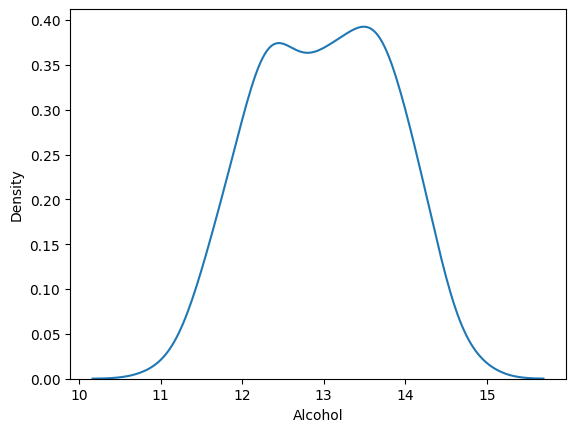

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

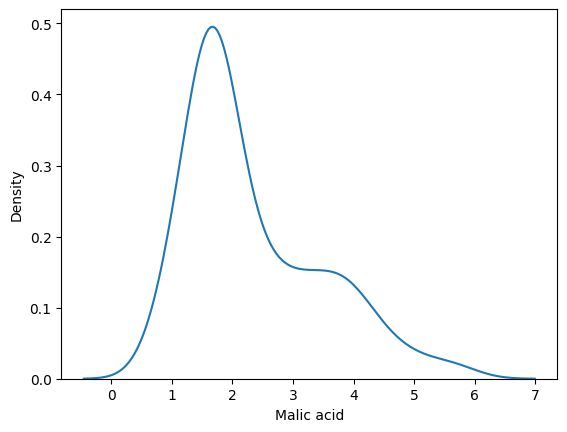

In [ ]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

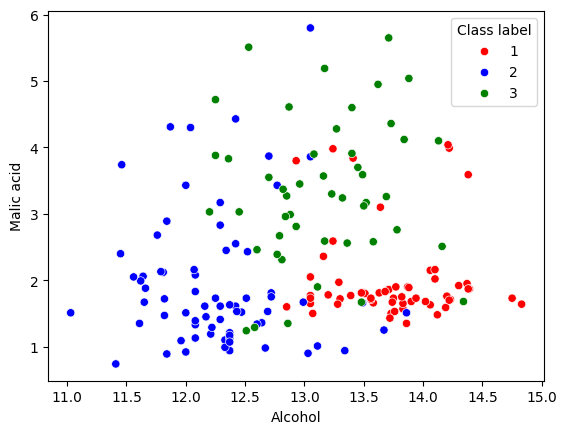

In [ ]:
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(df.drop('Class label' , axis=1) , df['Class label'] , test_size = 0.3 , random_state = 0)

In [ ]:
X_train.shape

(124, 2)

In [ ]:
X_test.shape

(54, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [ ]:
np.round(X_train_scaled.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [ ]:
np.round(X_train.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


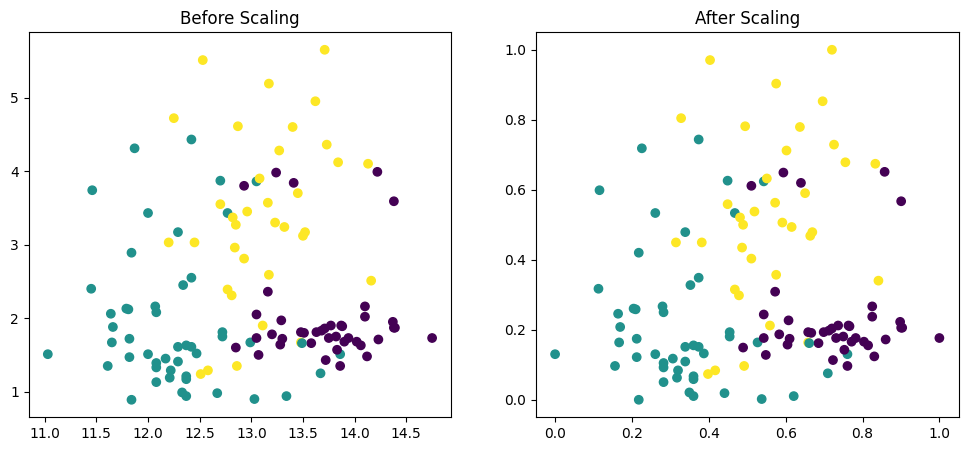

In [ ]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

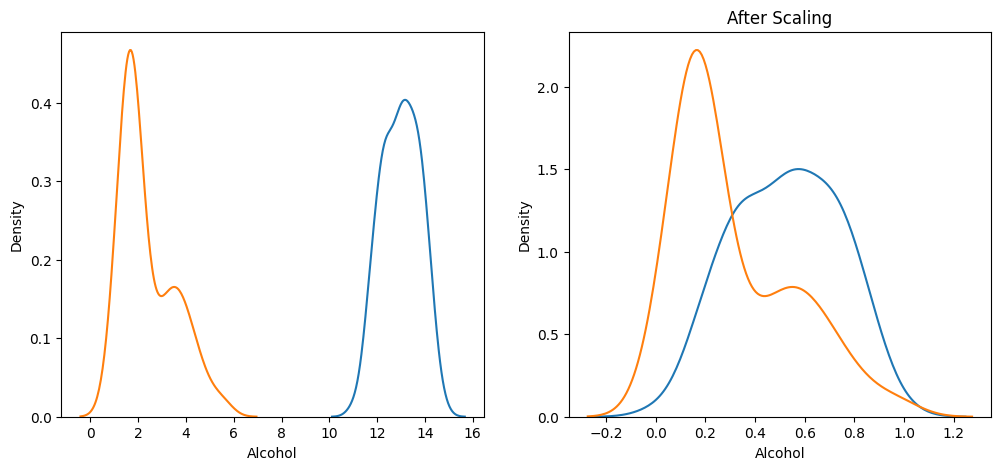

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize = (12,5))
axi.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'] , ax = ax1)
sns.kdeplot(X_train['Malic acid'] , ax= ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'] , ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'] , ax=ax2)